In [1]:
from google.colab import drive
drive.mount('/content/drive')
print("✅ Google Drive Bağlandı.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Google Drive Bağlandı.


In [2]:
import pandas as pd
import numpy as np

try:

    file_path = '/content/drive/MyDrive/Colab Notebooks/Womens Clothing E-Commerce Reviews.csv'
    df = pd.read_csv(file_path)
    print("✅ Veri Seti Başarıyla Yüklendi.")

    print("\n--- İlk 3 Satır ---")
    print(df[['Review Text', 'Rating', 'Recommended IND']].head(3).to_markdown(index=False))

    print("\n--- Veri Bilgisi (df.info()) ---")
    df.info()

except FileNotFoundError:
    print(f"❌ Hata: '{file_path}' dosyası bulunamadı. Lütfen dosya yolunun doğru olduğundan emin olun ve Google Drive'ınızın bağlı olduğundan emin olun.")
except Exception as e:
    print(f"❌ Bir hata oluştu: {e}")

✅ Veri Seti Başarıyla Yüklendi.

--- İlk 3 Satır ---
| Review Text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |   Rating |   Recommended IND |
|:-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [10]:
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Gerekli NLTK kaynaklarını indirme (Hata verse de, diğer bileşenler için kalsın)
try:
    nltk.download('stopwords')
    nltk.download('wordnet')
    nltk.download('omw-1.4')
    nltk.download('punkt')
except:
    pass

# NOT: df, önceki adımlarda başarıyla yüklenmiş ve temizlenmiş olmalıdır.
# Eğer df değişkeni tanımlı değilse, baştan yükleme kodunu da eklemelisiniz.
# df = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")

# 1. Veri Temizleme: Review Text'teki eksik değerleri (NaN) içeren satırları çıkaralım
df_cleaned = df.dropna(subset=['Review Text']).copy()
print(f"Eksik değerler çıkarıldıktan sonraki kayıt sayısı: {len(df_cleaned)}")

# Önişleme için gerekli bileşenleri tanımlama
stop_words_english = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):

    text = text.lower()

    text = re.sub(r'[^a-z\s]', '', text)

    words = text.split()

    words = [word for word in words if word not in stop_words_english]
    words = [lemmatizer.lemmatize(word) for word in words]
    return " ".join(words)

print("\nÖnişleme başlatılıyor... (Hatasız çalıştırmayı bekliyoruz)")
df_cleaned['Processed Text'] = df_cleaned['Review Text'].apply(preprocess_text)
print("✅ Önişleme Tamamlandı.")

print("\n--- İşlenmiş Metin Örnekleri (İlk 3 Satır) ---")
print(df_cleaned[['Review Text', 'Processed Text']].head(3).to_markdown(index=False))

df_final = df_cleaned[['Processed Text', 'Recommended IND']]
print(f"\nSon İşlem Görmüş DataFrame Boyutu: {len(df_final)}")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Eksik değerler çıkarıldıktan sonraki kayıt sayısı: 22641

Önişleme başlatılıyor... (Hatasız çalıştırmayı bekliyoruz)
✅ Önişleme Tamamlandı.

--- İşlenmiş Metin Örnekleri (İlk 3 Satır) ---
| Review Text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          | Processed Text                                                                                                                                                                                                                                                                                                |
|:-

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import pandas as pd

def map_rating_to_sentiment(rating):
    if rating >= 4:
        return 2
    elif rating == 3:
        return 1
    else:
        return 0
df_cleaned['Sentiment'] = df_cleaned['Rating'].apply(map_rating_to_sentiment)


sentiment_counts = df_cleaned['Sentiment'].value_counts().sort_index()
print("\n--- Yeni 3 Sınıflı Dağılım ---")
print(sentiment_counts.rename(index={0: 'Negatif (0)', 1: 'Nötr (1)', 2: 'Pozitif (2)'}).to_markdown())

X = df_cleaned['Processed Text']
y = df_cleaned['Sentiment']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nEğitim kümesi boyutu (X_train): {X_train.shape[0]} kayıt")
print(f"Test kümesi boyutu (X_test): {X_test.shape[0]} kayıt")

tfidf_vectorizer = TfidfVectorizer(max_features=5000)

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

X_test_tfidf = tfidf_vectorizer.transform(X_test)

print("\n✅ 3 Sınıflı Duygu Analizi İçin Vektörleştirme Tamamlandı.")
print(f"TF-IDF Eğitim Matrisi Boyutu: {X_train_tfidf.shape}")
print(f"TF-IDF Test Matrisi Boyutu: {X_test_tfidf.shape}")


--- Yeni 3 Sınıflı Dağılım ---
| Sentiment   |   count |
|:------------|--------:|
| Negatif (0) |    2370 |
| Nötr (1)    |    2823 |
| Pozitif (2) |   17448 |

Eğitim kümesi boyutu (X_train): 18112 kayıt
Test kümesi boyutu (X_test): 4529 kayıt

✅ 3 Sınıflı Duygu Analizi İçin Vektörleştirme Tamamlandı.
TF-IDF Eğitim Matrisi Boyutu: (18112, 5000)
TF-IDF Test Matrisi Boyutu: (4529, 5000)



--- 1. Modelleme ve Değerlendirme ---
   Logistic Regression tamamlandı. Süre: 0.27s
   Naive Bayes tamamlandı. Süre: 0.01s
   Random Forest tamamlandı. Süre: 27.34s
   Support Vector Machine (SVM) tamamlandı. Süre: 0.36s

--- ✅ TÜM MODELLER TAMAMLANDI ---

### 📊 Model Karşılaştırma Tablosu ###
| Model                        | Accuracy   |   Precision (Macro) |   Recall (Macro) |   F1-Score (Macro) |
|:-----------------------------|:-----------|--------------------:|-----------------:|-------------------:|
| Logistic Regression          | 81.72%     |              0.6463 |           0.5158 |             0.5492 |
| Naive Bayes                  | 78.05%     |              0.6992 |           0.3649 |             0.351  |
| Random Forest                | 78.34%     |              0.5676 |           0.3808 |             0.376  |
| Support Vector Machine (SVM) | 82.31%     |              0.6359 |           0.574  |             0.5959 |
✅ logreg_confusion_matrix.png görseli oluşturuldu.


/tmp/ipython-input-785656858.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='F1-Score (Macro)', data=df_plot.sort_values(by='F1-Score (Macro)', ascending=False), palette='magma')


✅ model_performance_comparison.png görseli oluşturuldu.


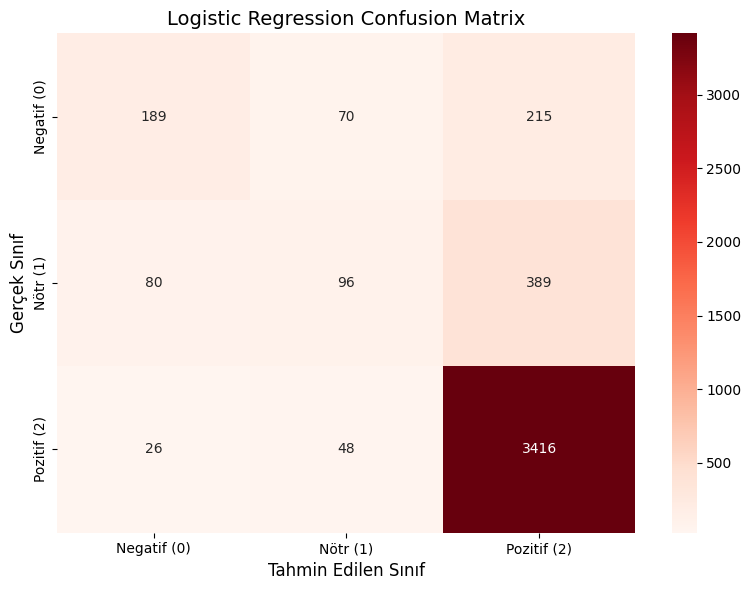

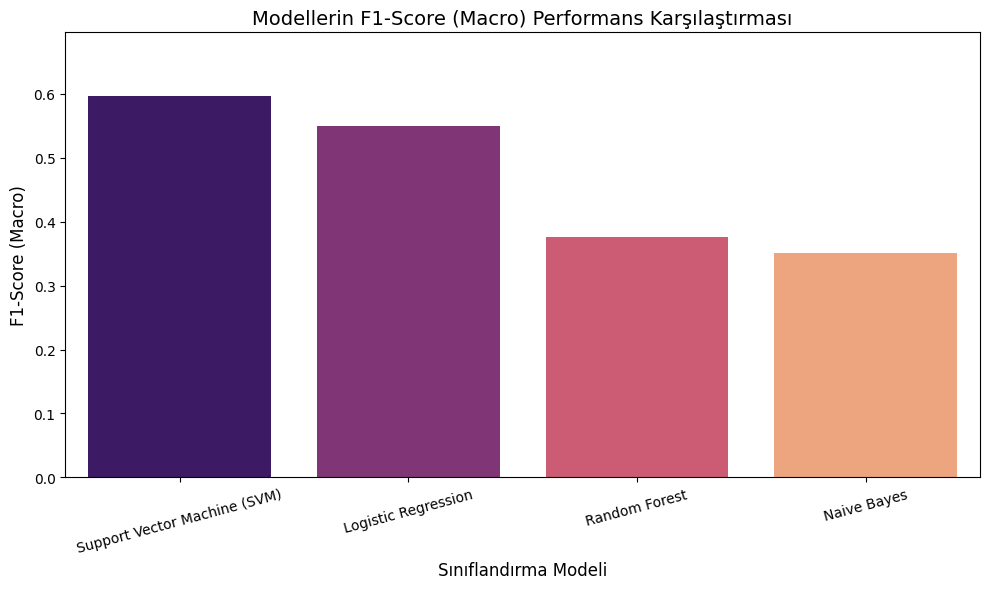

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix


print("\n--- 1. Modelleme ve Değerlendirme ---")

results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision (Macro)', 'Recall (Macro)', 'F1-Score (Macro)'])
model_predictions = {}

models = [
    ('Logistic Regression', LogisticRegression(random_state=42, max_iter=1000, solver='liblinear')),
    ('Naive Bayes', MultinomialNB()),
    ('Random Forest', RandomForestClassifier(random_state=42, n_estimators=100)),
    ('Support Vector Machine (SVM)', LinearSVC(random_state=42, dual=False))
]

for name, model in models:
    start_time = time.time()
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    model_predictions[name] = y_pred

    acc = accuracy_score(y_test, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='macro', zero_division=0)

    new_row = pd.DataFrame([{
        'Model': name,
        'Accuracy': f"{acc*100:.2f}%",
        'Precision (Macro)': f"{precision:.4f}",
        'Recall (Macro)': f"{recall:.4f}",
        'F1-Score (Macro)': f"{f1:.4f}"
    }])
    results = pd.concat([results, new_row], ignore_index=True)
    print(f"   {name} tamamlandı. Süre: {time.time() - start_time:.2f}s")

print("\n--- ✅ TÜM MODELLER TAMAMLANDI ---")


print("\n### 📊 Model Karşılaştırma Tablosu ###")
print(results.to_markdown(index=False))

log_reg_predictions = model_predictions['Logistic Regression']

cm = confusion_matrix(y_test, log_reg_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds',
            xticklabels=['Negatif (0)', 'Nötr (1)', 'Pozitif (2)'],
            yticklabels=['Negatif (0)', 'Nötr (1)', 'Pozitif (2)'])
plt.title('Logistic Regression Confusion Matrix', fontsize=14)
plt.ylabel('Gerçek Sınıf', fontsize=12)
plt.xlabel('Tahmin Edilen Sınıf', fontsize=12)
plt.tight_layout()
plt.savefig('logreg_confusion_matrix.png')
print("✅ logreg_confusion_matrix.png görseli oluşturuldu.")

df_plot = results.copy()
df_plot['F1-Score (Macro)'] = df_plot['F1-Score (Macro)'].astype(float)

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='F1-Score (Macro)', data=df_plot.sort_values(by='F1-Score (Macro)', ascending=False), palette='magma')
plt.title('Modellerin F1-Score (Macro) Performans Karşılaştırması', fontsize=14)
plt.ylabel('F1-Score (Macro)', fontsize=12)
plt.xlabel('Sınıflandırma Modeli', fontsize=12)
plt.xticks(rotation=15)
plt.ylim(0.0, df_plot['F1-Score (Macro)'].max() + 0.1)
plt.tight_layout()
plt.savefig('model_performance_comparison.png')
print("✅ model_performance_comparison.png görseli oluşturuldu.")

✅ sentiment_class_distribution.png görseli oluşturuldu.


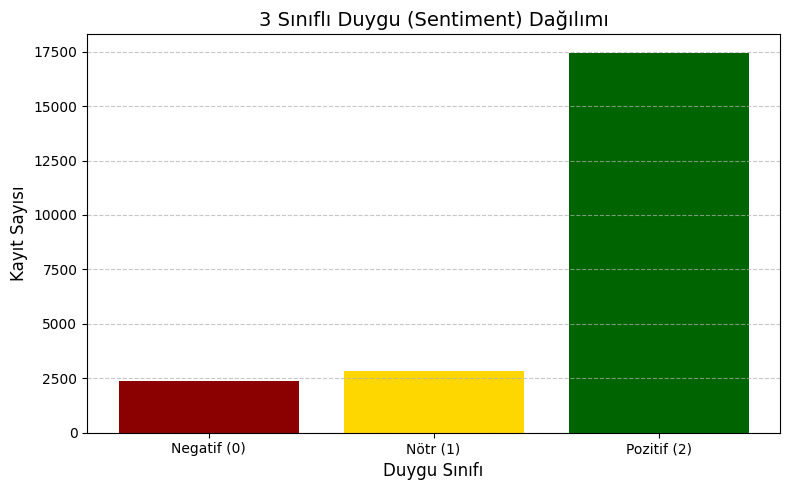

In [13]:
import matplotlib.pyplot as plt
import numpy as np

sentiment_counts = df_cleaned['Sentiment'].value_counts().sort_index()

sentiment_labels = {
    0: 'Negatif (0)',
    1: 'Nötr (1)',
    2: 'Pozitif (2)'
}
labels_sorted = [sentiment_labels[i] for i in sentiment_counts.index]

plt.figure(figsize=(8, 5))
plt.bar(labels_sorted, sentiment_counts.values, color=['darkred', 'gold', 'darkgreen'])
plt.title('3 Sınıflı Duygu (Sentiment) Dağılımı', fontsize=14)
plt.xlabel('Duygu Sınıfı', fontsize=12)
plt.ylabel('Kayıt Sayısı', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('sentiment_class_distribution.png')
print("✅ sentiment_class_distribution.png görseli oluşturuldu.")